# House Price Prediction
## Introduction 
The house price dataset presents an intriguing challenge, aiming to predict housing prices based on a variety of factors such as house area, number of bedrooms, furnishing status, proximity to main roads, presence of guestrooms and basement, and availability of air conditioning. Despite its small size, the dataset poses significant complexity due to strong multicollinearity among its variables. This complexity adds layers of difficulty to the task of building accurate predictive models.

### Research Questions
- How do various features such as house area, number of bedrooms, and presence of amenities influence housing prices?
- What is the impact of multicollinearity on the accuracy of predictive models for housing prices?
- Can we identify the most influential factors in determining housing prices?
- How does the proximity to main roads affect property values?
- Are there any interactions among different features that significantly affect housing prices?

### Data Mining Problem and Objectives
#### Problem
The data mining problem revolves around building regression models to predict housing prices accurately despite the presence of strong multicollinearity among the predictor variables.

#### Objectives
- Develop regression models that accurately predict housing prices based on the provided features.
- Identify and mitigate the impact of multicollinearity on model performance.
- Determine the most influential factors affecting housing prices.
- Investigate interactions among predictor variables to improve model accuracy.
- Assess the impact of proximity to main roads on property values.

### Formulation of the Problem
Given a dataset containing information about various features of houses, as well as their corresponding prices, the task is to build regression models that can predict housing prices accurately. However, the presence of strong multicollinearity among predictor variables presents a challenge in developing robust models. Therefore, data preprocessing techniques such as feature selection, dimensionality reduction, and regularization will be employed to mitigate multicollinearity and improve model performance. Additionally, interactions among predictor variables will be explored to uncover hidden patterns that influence housing prices. The ultimate goal is to develop regression models that provide accurate predictions while effectively handling the complexities inherent in the dataset.

# Implementation

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings

%matplotlib inline
mpl.style.use('ggplot')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Data Wrangling

In [2]:
# load the dataset
house_data = pd.read_csv('Data/Housing.csv')
print(house_data.shape)
house_data.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2.0,no,furnished


In [3]:
# information of data
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           540 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [4]:
# check the null counts
house_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             5
prefarea            0
furnishingstatus    0
dtype: int64

- From the observed outputs, it's evident that the dataset contains null values. 

## 2. Data Preprocessing & Feature Engineering
### 2.1. Handling missing values

In [5]:
# display the null records
house_data[house_data.isnull().any(axis=1)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,NaN,no,unfurnished
14,9240000,7800,3,2,2,yes,no,no,no,no,NaN,yes,semi-furnished
45,7560000,6000,3,2,3,yes,no,no,no,yes,NaN,no,semi-furnished
49,7420000,7440,3,2,1,yes,yes,yes,no,yes,NaN,yes,semi-furnished
79,6650000,6000,3,2,3,yes,yes,no,no,yes,NaN,no,furnished


In [6]:
house_data['parking'].value_counts()

0.0    294
1.0    126
2.0    108
3.0     12
Name: parking, dtype: int64

In [7]:
# impute with 0
house_data['parking'].fillna(0, inplace=True)
house_data['parking'].isnull().sum()

0

In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


- now we can see there are no null records

### 2.2. Handling Duplicates Records

In [9]:
# display duplicate records
house_data[house_data.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


### 2.3. Handling with Outliers

In [10]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


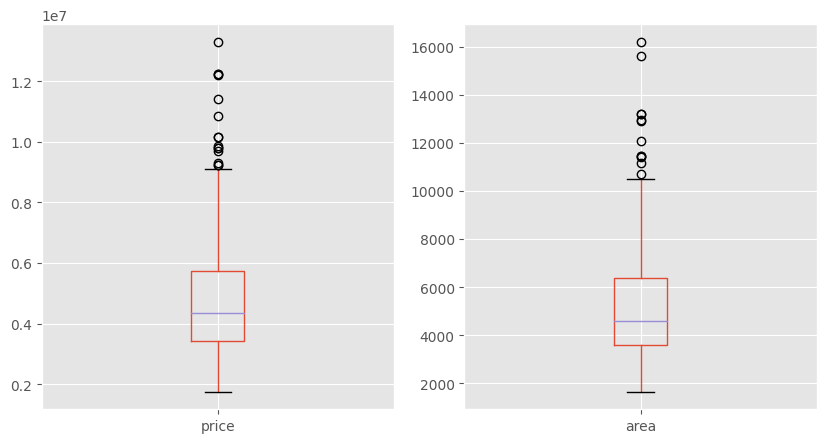

In [11]:
# boxplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
house_data[['price']].boxplot()

plt.subplot(1, 2, 2)
house_data[['area']].boxplot()
plt.show()

- Upon reviewing the box plot output, it's evident that outliers exist within the **‘price’ and ‘area’** variables. 

In [12]:
# function for get upper lower limit
def boundary_limit(data, col):
    
    # find Q1, Q2, and IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    print("IQR of " + col + " : ", IQR)
    
    # find the upper and lower boundaries
    upper_limit = Q3 + IQR * 1.5
    lower_limit = Q1 - IQR * 1.5

    print('Upper Limit of ' + col + ' : ', upper_limit)
    print('Lower Limit of ' + col + ' : ', lower_limit)
    
    print('Number of Outliers Records : ', data[data[col] > upper_limit].shape[0])
    
    return upper_limit, lower_limit

#### Area

In [13]:
upper_area, lower_area = boundary_limit(house_data, 'area')

IQR of area :  2760.0
Upper Limit of area :  10500.0
Lower Limit of area :  -540.0
Number of Outliers Records :  12


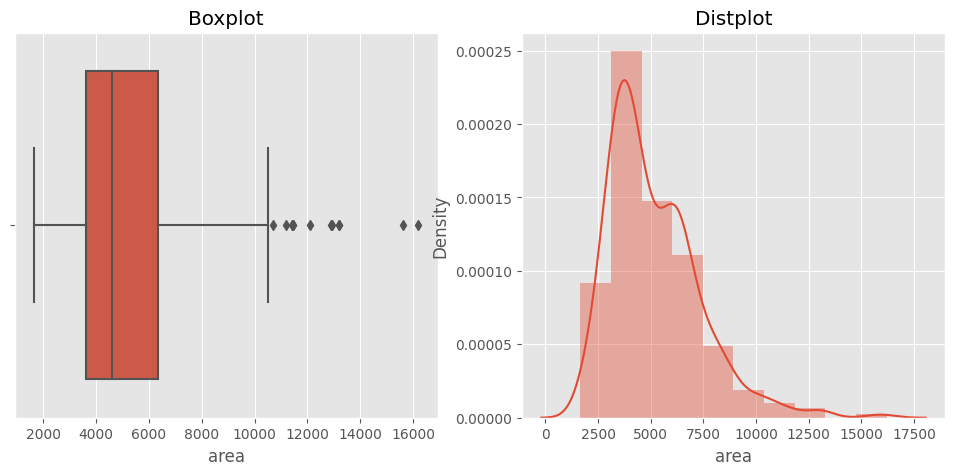

In [14]:
# boxplot and distribution plot of 'Duration Hours'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(house_data['area'], ax=ax[0])
ax[0].set_title('Boxplot')

sns.distplot(house_data['area'], bins=10, kde=True, ax=ax[1])
ax[1].set_title('Distplot')
plt.show()

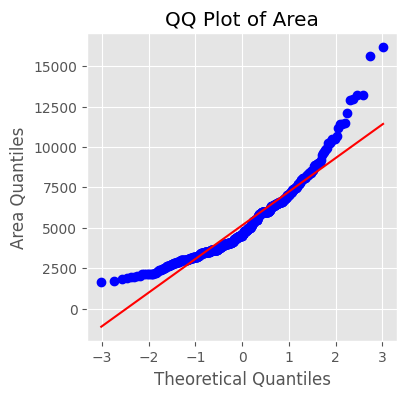

In [15]:
# Q-Q Plot 
qq_area = house_data['area']
plt.figure(figsize = (4, 4))
stats.probplot(qq_area, plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Area Quantiles')
plt.title('QQ Plot of Area')
plt.show()

In [16]:
# Shapiro-Wilk Test
shapiro_test = stats.shapiro(qq_area)
statistic, p_value = shapiro_test
print('Shapiro-Wilk Test for Area')
print(f"Shapiro-Wilk Test Statistic: {statistic:.4f}")
print(f"p-value: {p_value:.2f}")

if p_value > 0.05:
    print("The data in area seems to be normally distributed.")
else:
    print("The data in area might not be normally distributed.")

Shapiro-Wilk Test for Area
Shapiro-Wilk Test Statistic: 0.9113
p-value: 0.00
The data in area might not be normally distributed.


In [17]:
# Impute outliers with median
house_data.loc[house_data['area'] > upper_area, 'area'] = house_data['area'].median()
house_data.shape

(545, 13)

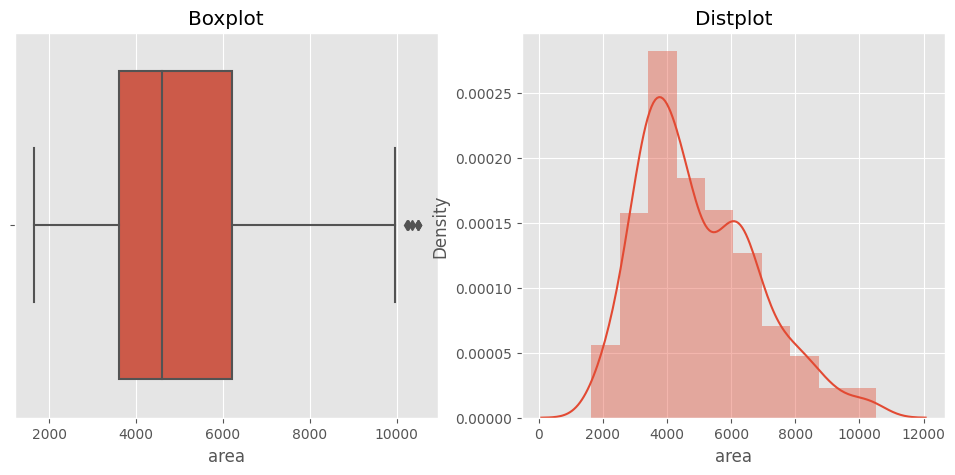

In [18]:
# re do the boxplot and distribution plot of 'Duration Hours'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(house_data['area'], ax=ax[0])
ax[0].set_title('Boxplot')

sns.distplot(house_data['area'], bins=10, kde=True, ax=ax[1])
ax[1].set_title('Distplot')
plt.show()

#### Price

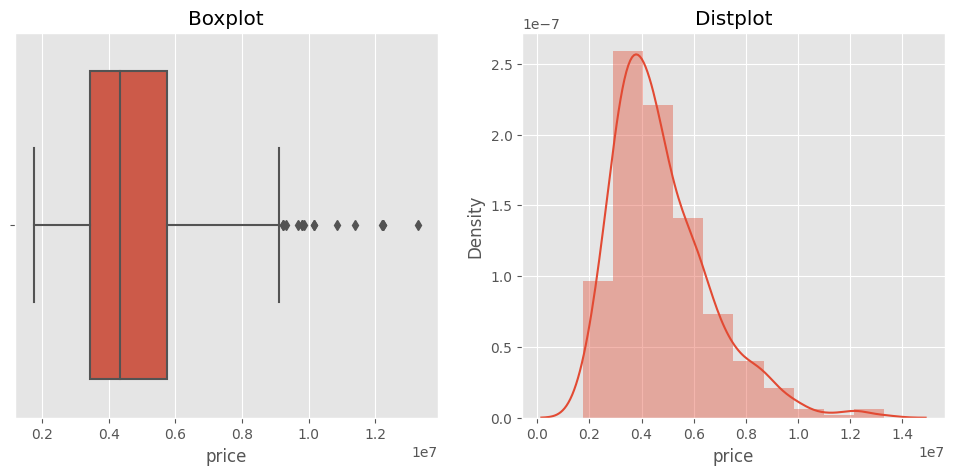

In [19]:
# boxplot and distribution plot of 'Price'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(house_data['price'], ax=ax[0])
ax[0].set_title('Boxplot')

sns.distplot(house_data['price'], bins=10, kde=True, ax=ax[1])
ax[1].set_title('Distplot')
plt.show()

In [20]:
upper_price, lower_price = boundary_limit(house_data, 'price')

IQR of price :  2310000.0
Upper Limit of price :  9205000.0
Lower Limit of price :  -35000.0
Number of Outliers Records :  15


In [21]:
# remove outliers
house_data = house_data[~(house_data['price'] > upper_price)]
house_data.shape

(530, 13)

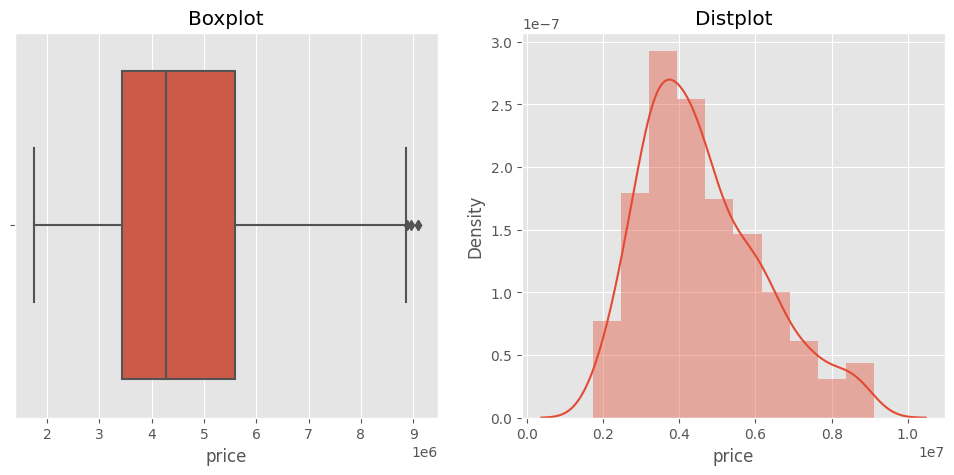

In [22]:
# after remove outliers
# boxplot and distribution plot of 'Price'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(house_data['price'], ax=ax[0])
ax[0].set_title('Boxplot')

sns.distplot(house_data['price'], bins=10, kde=True, ax=ax[1])
ax[1].set_title('Distplot')
plt.show()

## 3. Exploratory Data Analysis - EDA
### 3.1. Data Analysis

In [23]:
# Investigate all the elements whithin each Feature 
for column in house_data:
    unique_vals = np.unique(house_data[column])
    nr_values = len(unique_vals)
    if nr_values < 20:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature price :208
The number of values for feature area :268
The number of values for feature bedrooms :6 -- [1 2 3 4 5 6]
The number of values for feature bathrooms :3 -- [1 2 3]
The number of values for feature stories :4 -- [1 2 3 4]
The number of values for feature mainroad :2 -- ['no' 'yes']
The number of values for feature guestroom :2 -- ['no' 'yes']
The number of values for feature basement :2 -- ['no' 'yes']
The number of values for feature hotwaterheating :2 -- ['no' 'yes']
The number of values for feature airconditioning :2 -- ['no' 'yes']
The number of values for feature parking :4 -- [0. 1. 2. 3.]
The number of values for feature prefarea :2 -- ['no' 'yes']
The number of values for feature furnishingstatus :3 -- ['furnished' 'semi-furnished' 'unfurnished']


In [24]:
# Separate categorical and numerical features
def extract_features(data):
    
    cat_features = data.select_dtypes(include=['object']).columns
    num_features = data.select_dtypes(exclude=['object']).columns

    return cat_features, num_features

In [25]:
categorical, numerical = extract_features(house_data)
print('Number of Categorical Variables : ', len(categorical))
print('Categorical Variables : ', categorical)

print('Number of Numerical Variables : ', len(numerical))
print('Numerical Variables : ', numerical)

Number of Categorical Variables :  7
Categorical Variables :  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')
Number of Numerical Variables :  6
Numerical Variables :  Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


### 3.2. Distribution of Categorical features

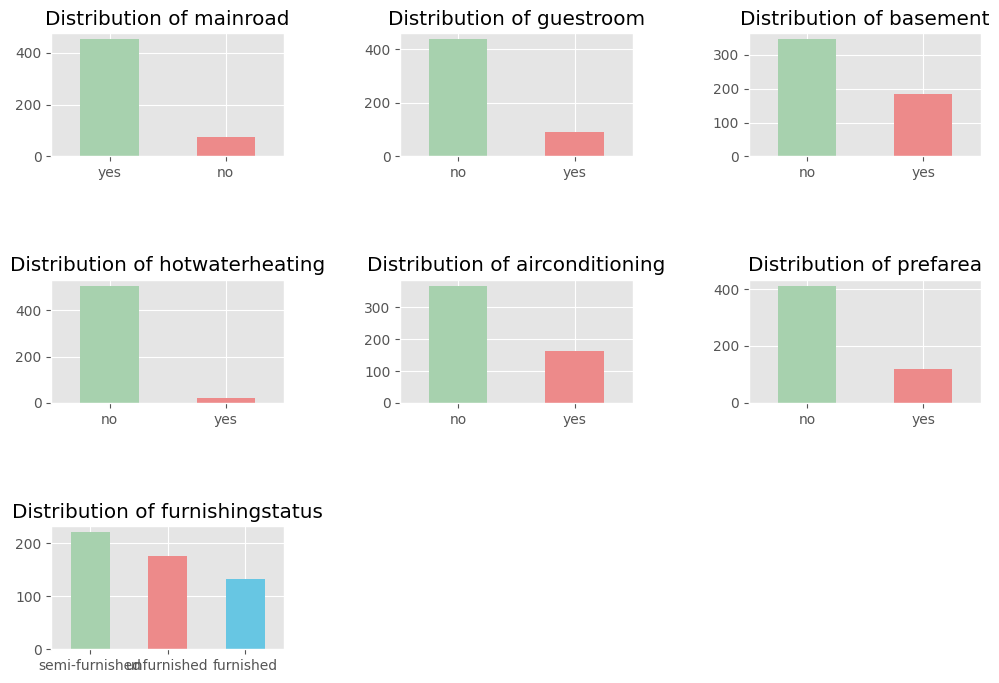

In [26]:
plt.figure(figsize = (12, 8))
plt.subplots_adjust(hspace = 1, wspace=0.5)

for i, col in enumerate(categorical):
    plt.subplot(3, 3, i+1)
    house_data[col].value_counts().plot(kind = 'bar', 
                                           color = ['#a7d1ae', '#ed8a8a', "#67C6E3"], 
                                           rot = 0)
    plt.title("Distribution of " + col)
plt.show()

### 3.3. Furnished Status vs House Price

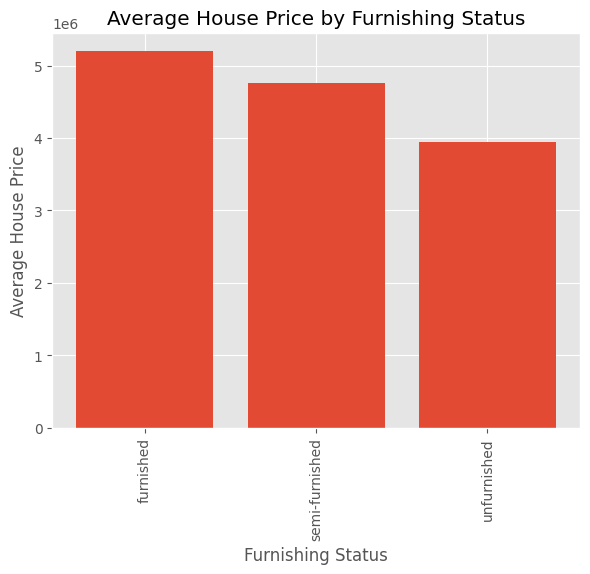

In [27]:
house_prices = house_data.groupby('furnishingstatus')['price'].mean().reset_index()
house_prices = house_prices.sort_values(by="price", ascending =False)

plt.figure(figsize=(6, 6))
plt.bar(house_prices['furnishingstatus'], house_prices['price'])
plt.xlabel('Furnishing Status')
plt.ylabel('Average House Price')
plt.title('Average House Price by Furnishing Status')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- From the presented plot, it's evident that the **Furnished house** has a notably higher average house price compared to other furnished status. 

### 3.4. Stories Vs House Price

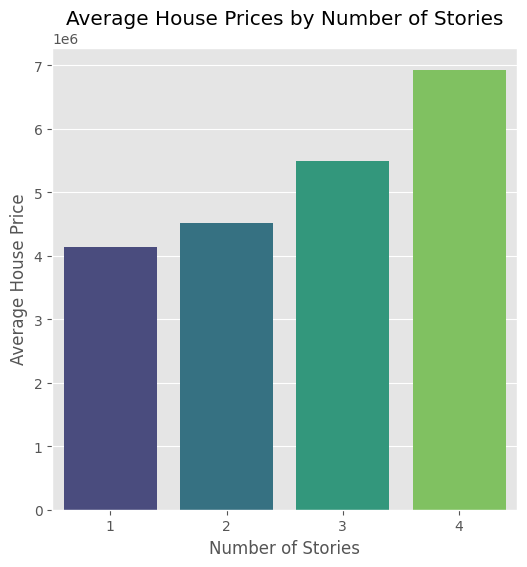

In [28]:
average_prices_by_stories = house_data.groupby('stories')['price'].mean().reset_index()
average_prices_by_stories = average_prices_by_stories.sort_values(by='price', ascending=True)

plt.figure(figsize=(6, 6))
ax = sns.barplot(x='stories', y='price', data=average_prices_by_stories, palette='viridis')

plt.xlabel('Number of Stories')
plt.ylabel('Average House Price')
plt.title('Average House Prices by Number of Stories')
plt.show()

- The analysis reveals a significant price variation linked to the number of stories in a house, indicating a positive correlation between the number of stories and house prices.

### 3.5. Bedrooms, Bathrooms  Vs Flight Price

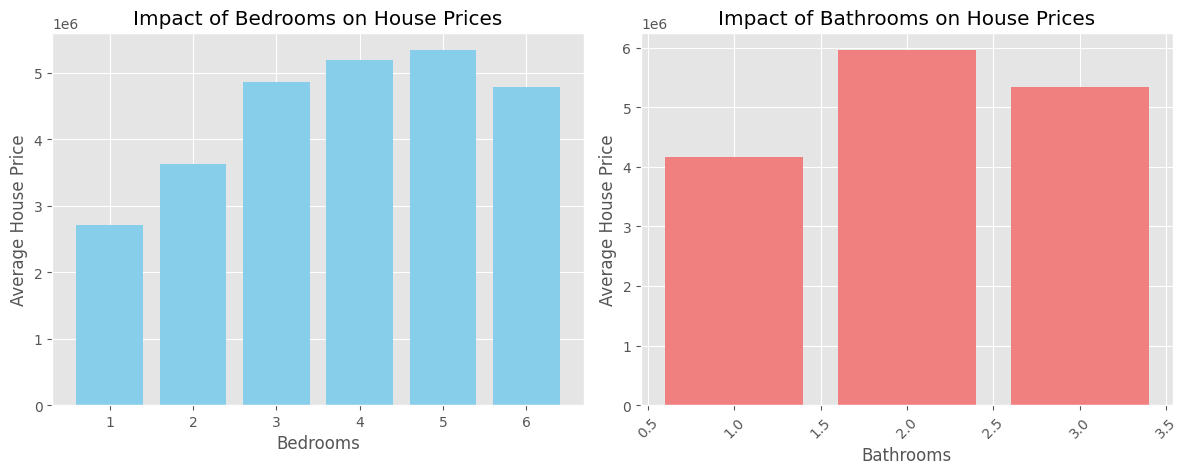

In [29]:
bedroom_prices = house_data.groupby('bedrooms')['price'].mean().reset_index()
bathroom_prices = house_data.groupby('bathrooms')['price'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot of 'Source'
ax1.bar(bedroom_prices['bedrooms'], bedroom_prices['price'], color='skyblue')
ax1.set_xlabel('Bedrooms')
ax1.set_ylabel('Average House Price')
ax1.set_title('Impact of Bedrooms on House Prices')

# Plot of 'Destination' 
ax2.bar(bathroom_prices['bathrooms'], bathroom_prices['price'], color='lightcoral')
ax2.set_xlabel('Bathrooms')
ax2.set_ylabel('Average House Price')
ax2.set_title('Impact of Bathrooms on House Prices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- There seems to be a positive correlation between the **number of bedrooms and house prices**. This suggests that houses with more bedrooms tend to be more expensive.
- Similar to the left graph, there appears to be a positive correlation between the **number of bathrooms and house prices**. Houses with more bathrooms seem to be more expensive on average.

## 4. Handling Categorical Data

In [30]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             530 non-null    int64  
 1   area              530 non-null    int64  
 2   bedrooms          530 non-null    int64  
 3   bathrooms         530 non-null    int64  
 4   stories           530 non-null    int64  
 5   mainroad          530 non-null    object 
 6   guestroom         530 non-null    object 
 7   basement          530 non-null    object 
 8   hotwaterheating   530 non-null    object 
 9   airconditioning   530 non-null    object 
 10  parking           530 non-null    float64
 11  prefarea          530 non-null    object 
 12  furnishingstatus  530 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 58.0+ KB


### 4.1. OneHot Encoding

In [31]:
house_encoded = pd.get_dummies(house_data, columns=categorical, 
                               drop_first=True)
house_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2.0,1,0,1,0,0,0,1,0
16,9100000,6600,4,2,2,1.0,1,1,1,0,1,1,0,1
17,8960000,8500,3,2,4,2.0,1,0,0,0,1,0,0,0
18,8890000,4600,3,2,2,2.0,1,1,0,0,1,0,0,0
19,8855000,6420,3,2,2,1.0,1,0,0,0,1,1,1,0


## 5. Correlation Heatmap

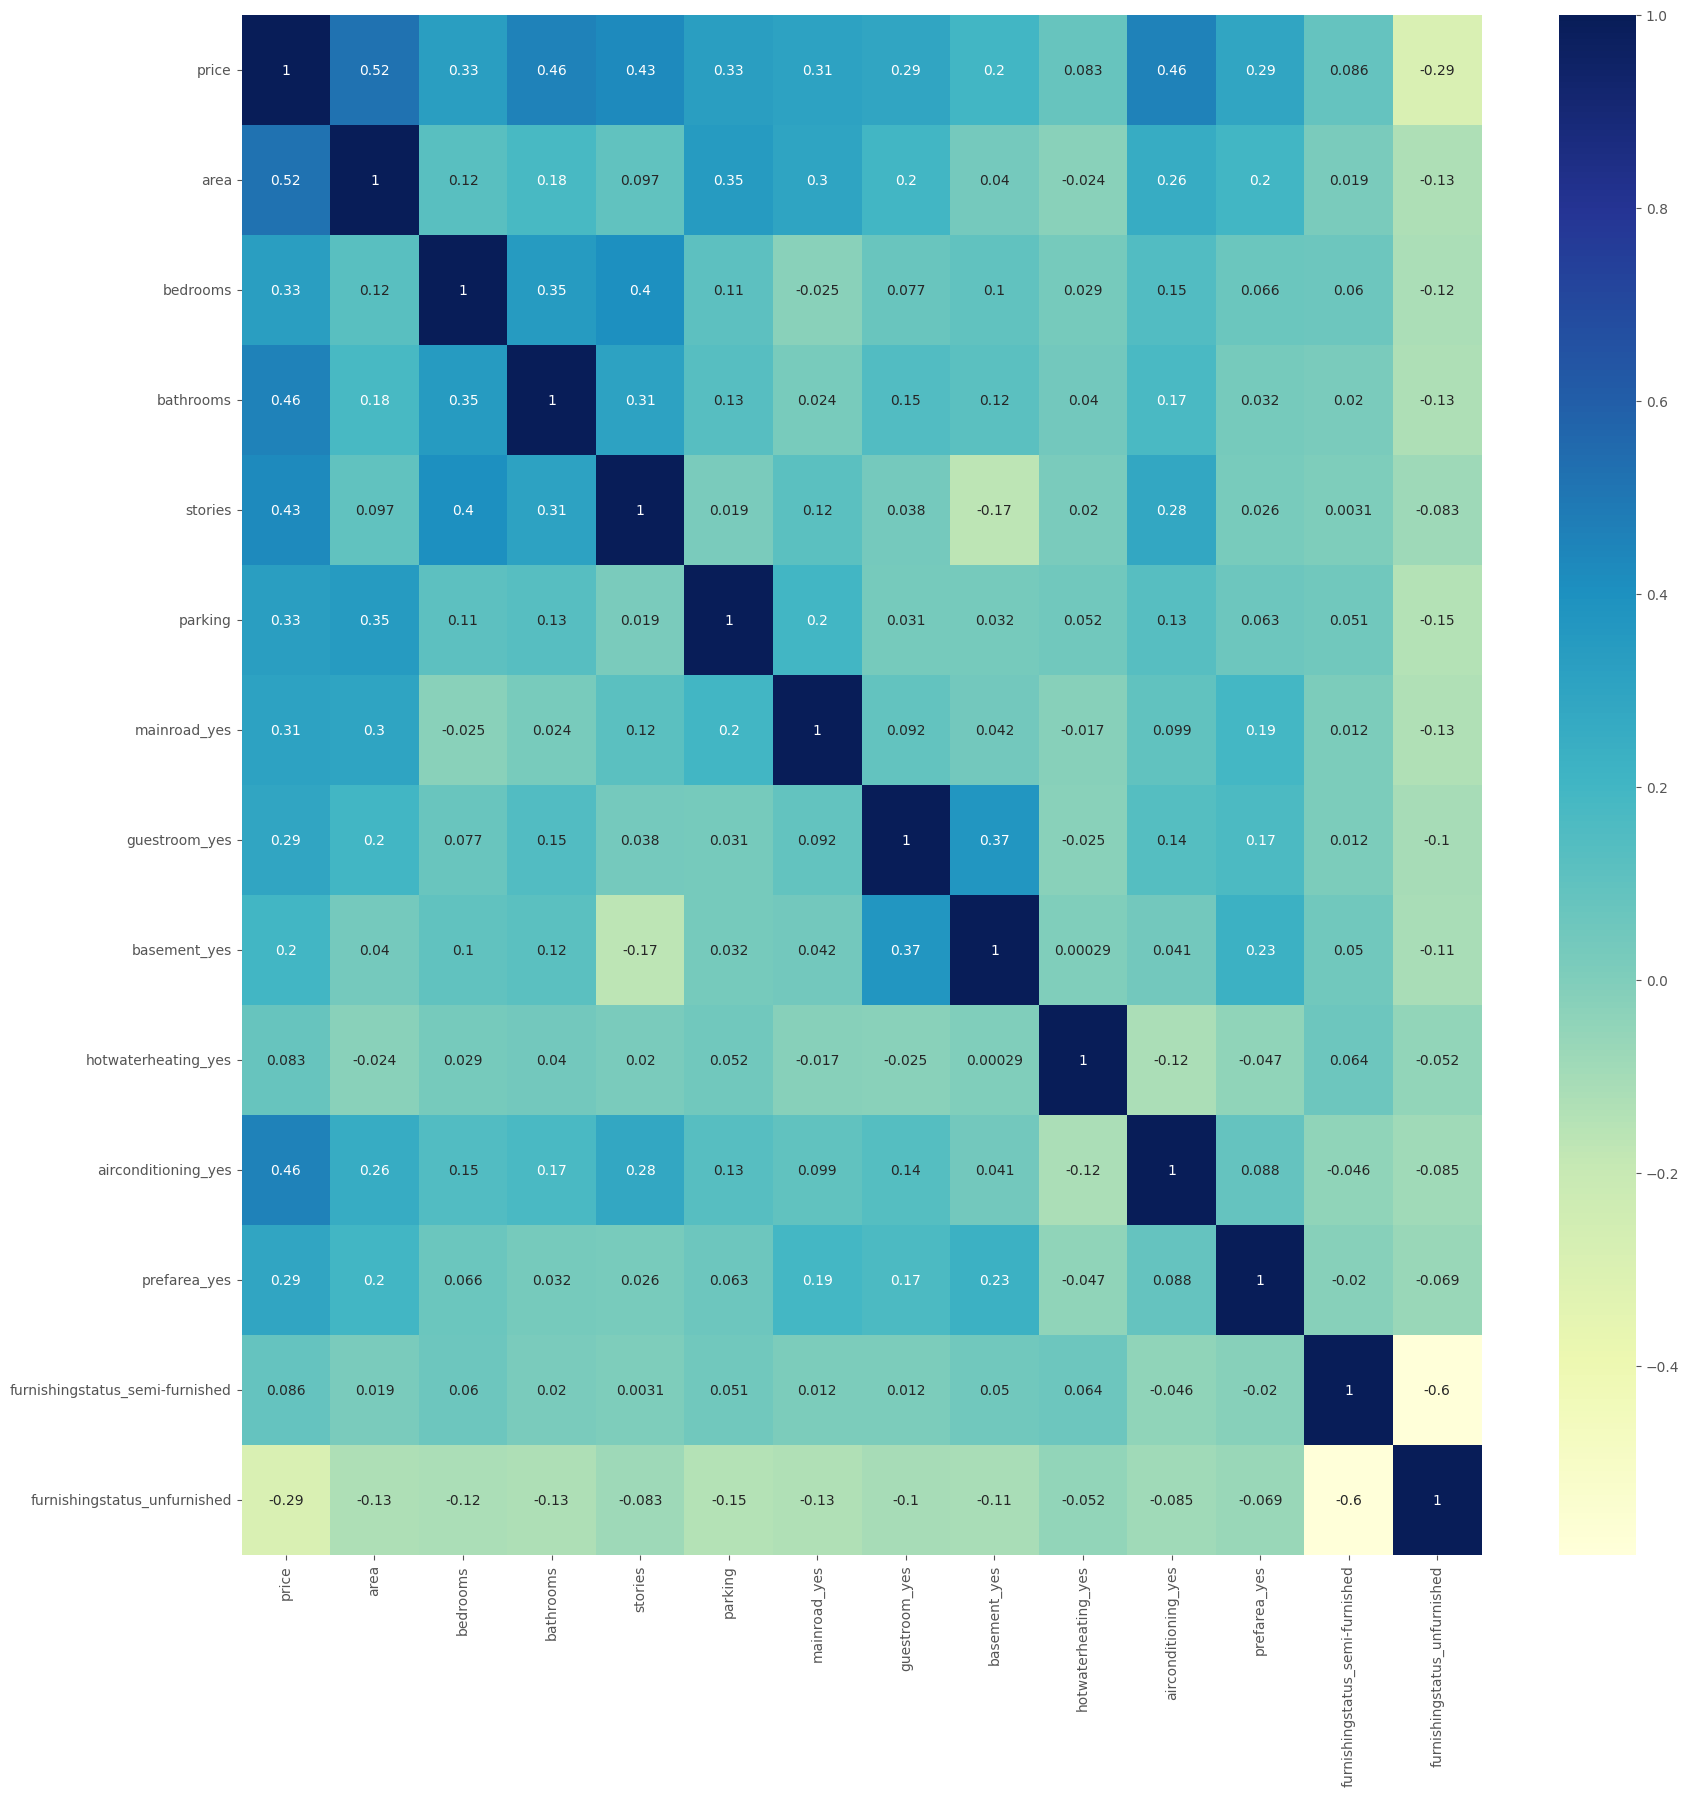

In [32]:
# Finds correlation using heatmap
plt.figure(figsize = (20,20))
sns.heatmap(house_encoded.corr(), annot = True, cmap = "YlGnBu")
plt.show()

- All the features have a **positive correlation with Price**. The Area feature has a strong positive correlation with price.

In [33]:
# identify more correlated feature 
def cor_feature(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# call the function with 0.8 threshold
cor_feature(house_encoded, 0.8)

set()

## 6. Independent and Dependent features

In [34]:
# Independent features
X = house_encoded.drop(['price'], axis=1)

# Dependent feature
y = house_encoded['price']

print(X.shape)
print(y.shape)

(530, 13)
(530,)


## 7. Scaling the data

In [35]:
sc = MinMaxScaler()
sc.fit(X)
X_scaled = pd.DataFrame(sc.transform(X),
                           columns = X.columns)
X_scaled.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.491525,0.6,0.0,0.333333,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.559322,0.6,0.5,0.333333,0.333333,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,0.774011,0.4,0.5,1.000000,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.333333,0.4,0.5,0.333333,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.538983,0.4,0.5,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


## 8. Model Training and Predictions

In [36]:
# KFold object for splitting data
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate through each fold
for train_index, test_index in kf.split(X_scaled):
    # Split data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)

    # Lasso Regression
    lasso_model = Lasso()
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)

    # Ridge Regression
    ridge_model = Ridge()
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

## 9. Model Comparison

In [37]:
model_name = ["Linear Regression", "Lasso Regression", "Ridge Regression"]
models = [linear_model, lasso_model, ridge_model]
y_pred = [y_pred_linear, y_pred_lasso, y_pred_ridge]

# function for compare models
def compare_model(model_name, model, pred):
    print("********** " + model_name + " ***********")
    print('')
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("Mean Absolute Error : ", mean_absolute_error(y_test, pred))
    print("Mean Squared Error : ", mean_squared_error(y_test, pred))
    print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, pred)))
    print("R^2 score : ", r2_score(y_test, pred))
    
    # Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')
    
    # Plot Residuals
    residuals = y_test - pred

    plt.subplot(1, 2, 2)
    plt.scatter(pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

********** Linear Regression ***********

Coefficients: [ 2.41515982e+02  9.12410830e+04  7.68531583e+05  4.43662320e+05
  2.04207857e+05  4.46402292e+05  3.24228636e+05  3.20139144e+05
  1.09424560e+06  8.62467848e+05  5.19841801e+05  6.66742251e+04
 -3.38580869e+05]
Intercept: 373538.2183275316
Mean Absolute Error :  709930.8012881123
Mean Squared Error :  828607800676.851
Root Mean Squared Error :  910278.9686007531
R^2 score :  0.6385420836094562


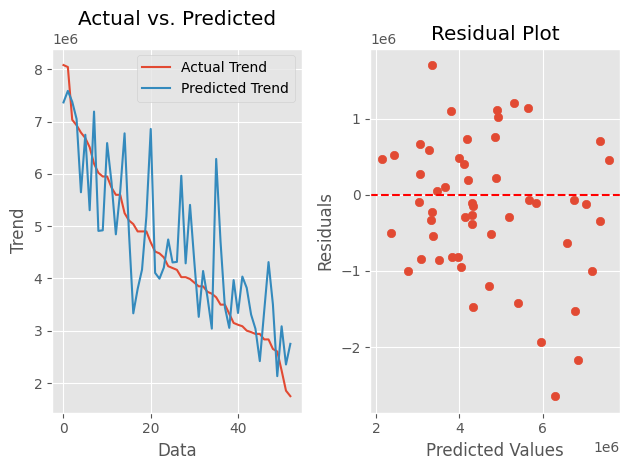

********** Lasso Regression ***********

Coefficients: [ 2.41517557e+02  9.12405004e+04  7.68528500e+05  4.43662811e+05
  2.04207439e+05  4.46394285e+05  3.24223842e+05  3.20138879e+05
  1.09421504e+06  8.62461792e+05  5.19836516e+05  6.66707651e+04
 -3.38580794e+05]
Intercept: 373548.8302306719
Mean Absolute Error :  709928.6373105225
Mean Squared Error :  828599346499.2891
Root Mean Squared Error :  910274.3248599782
R^2 score :  0.6385457715175399


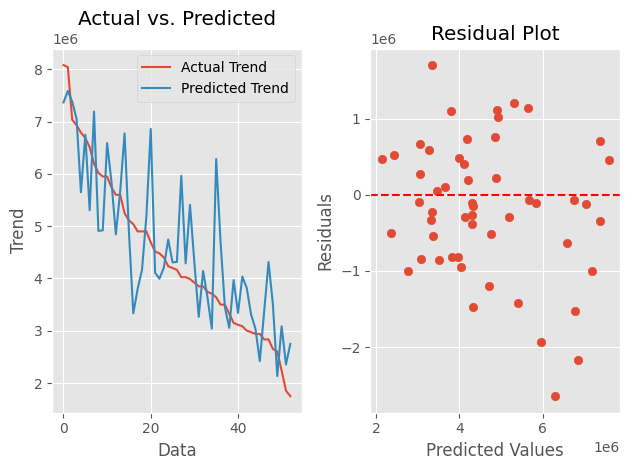

********** Ridge Regression ***********

Coefficients: [ 2.43327992e+02  9.29950274e+04  7.61533662e+05  4.45204134e+05
  2.05130505e+05  4.39422781e+05  3.22551222e+05  3.22071352e+05
  1.02592992e+06  8.49897956e+05  5.11772087e+05  6.80286215e+04
 -3.37404310e+05]
Intercept: 377711.62233498786
Mean Absolute Error :  705082.872413793
Mean Squared Error :  811482389978.7563
Root Mean Squared Error :  900823.1735356037
R^2 score :  0.6460125844461719


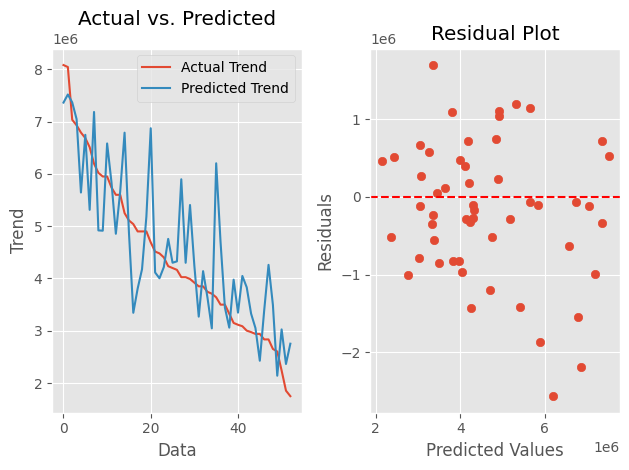

In [38]:
for i in range(0,len(models)):
    compare_model(model_name[i], models[i], y_pred[i])

- Based on the model evaluation of Linear, Lasso, and Ridge Regression models, the **Ridge regression model** achieved slightly better accuracy than Linear and Lasso regression models. So, the Ridge regression model is a good model for house price predictions.

## 10. Save the model

In [39]:
pickle.dump(linear_model, open('models/2.1. linear_model.pkl', 'wb'))
pickle.dump(lasso_model, open('models/2.2. lasso_model.pkl', 'wb'))
pickle.dump(ridge_model, open('models/2.3. ridge_model.pkl', 'wb'))

## Regression Modeling Results
- **Model Performance:** We developed multiple regression models using techniques such as linear regression, ridge regression, and lasso regression to predict housing prices. Through rigorous evaluation using metrics like mean squared error (MSE), R-squared, and cross-validation, we identified the best-performing model.
- **Feature Importance:** Our analysis revealed the most influential factors affecting housing prices. Features such as house area, number of bedrooms, presence of amenities (e.g., air conditioning, basement), and proximity to main roads emerged as significant predictors of property values.
- **Handling Multicollinearity:** Given the presence of strong multicollinearity among predictor variables, we employed techniques like feature selection to mitigate its impact on model performance. These techniques helped improve the robustness and stability of our regression models.

## Actionable Insights
- **Optimal Pricing Strategy:** By understanding the factors that drive housing prices, real estate professionals can adopt a more data-driven approach to pricing properties. Properties with larger areas, more bedrooms, and desirable amenities are likely to command higher prices in the market.
- **Investment Opportunities:** Investors can use regression modeling results to identify investment opportunities in the real estate market. Properties located near main roads or with potential for additional amenities (e.g., basement conversion, installation of air conditioning) may offer higher returns on investment.
- **Targeted Marketing:** Real estate agents can leverage insights from regression models to tailor their marketing strategies. For example, they can highlight specific features of a property (e.g., spacious layout, modern amenities) that are known to appeal to potential buyers and justify the asking price.